## Search Analysis with Optuna

In this notebook, I will demo the built-in plotting functions from Optuna.

We will use the [matplotlib backend](https://optuna.readthedocs.io/en/stable/reference/visualization/matplotlib.html). Optuna also offers the functions with [plotly backend](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import optuna

## Load the search results

We created and stored this search in the previous notebook.

In [3]:
# Load the SQLite database with the experiments/trials
study_name = "cnn_study"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)

study = optuna.load_study(
    study_name=study_name,
    storage=storage_name,
)

In [4]:
study.best_params

{'activation': 'relu',
 'filters': 64,
 'kernel_size': 5,
 'learning_rate': 0.0020539678624769604,
 'num_conv_layers': 3,
 'num_dense_layers': 2,
 'optimizer_name': 'Adam',
 'strides': 2,
 'units': 114}

## Optimization history

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\2278197192.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_optimization_history(study)


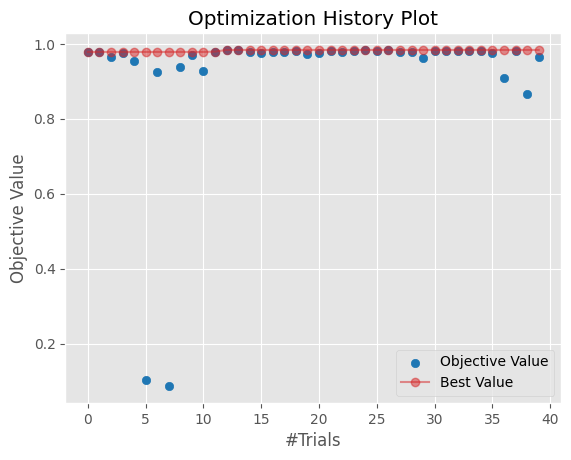

In [5]:
fig = optuna.visualization.matplotlib.plot_optimization_history(study)

## Contour plot - 2D plots

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\3483989461.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(
[W 2023-05-29 15:48:21,335] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<Axes: ylabel='num_conv_layers'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='num_dense_layers'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='optimizer_name'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='num_conv_layers', ylabel='units'>,
        <Axes: xlabel='num_dense_layers'>,
        <Axes: xlabel='optimizer_name'>, <Axes: xlabel='units'>]],
      dtype=object)

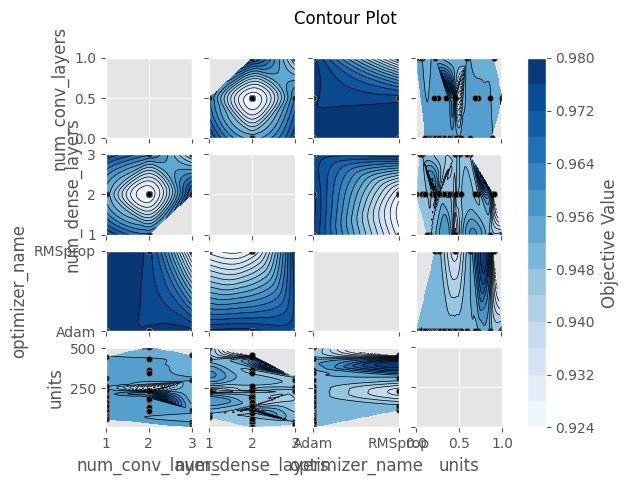

In [6]:
optuna.visualization.matplotlib.plot_contour(
    study,
    params=["num_conv_layers", "num_dense_layers", "optimizer_name", 'units'],
)

## Plot slice

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\703580076.py:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(


array([<Axes: xlabel='num_conv_layers', ylabel='Objective Value'>,
       <Axes: xlabel='num_dense_layers'>, <Axes: xlabel='optimizer_name'>,
       <Axes: xlabel='units'>], dtype=object)

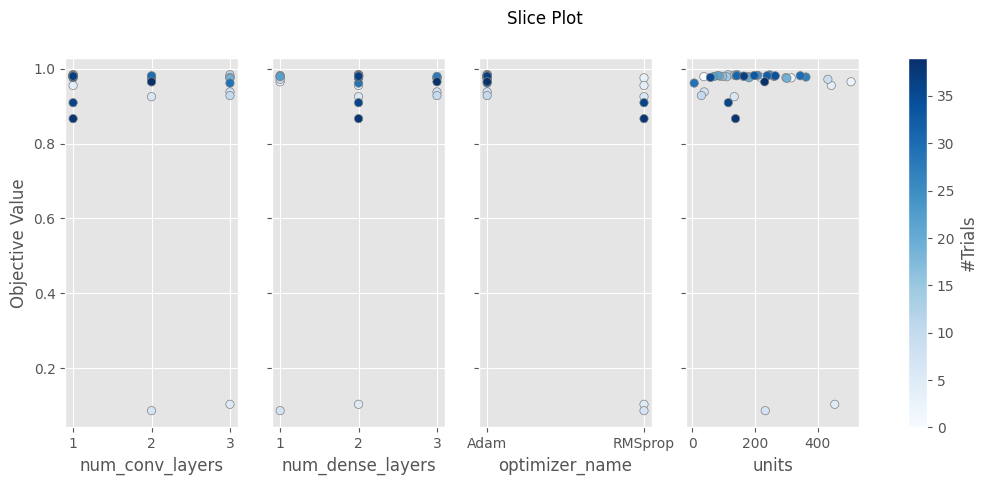

In [7]:
optuna.visualization.matplotlib.plot_slice(
    study,
    params=["num_conv_layers", "num_dense_layers", "optimizer_name", 'units'],
)

## Parameter importance

fAnova by default but there are other methods. More details [here](https://optuna.readthedocs.io/en/stable/reference/importance.html)

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\1036994904.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Axes: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

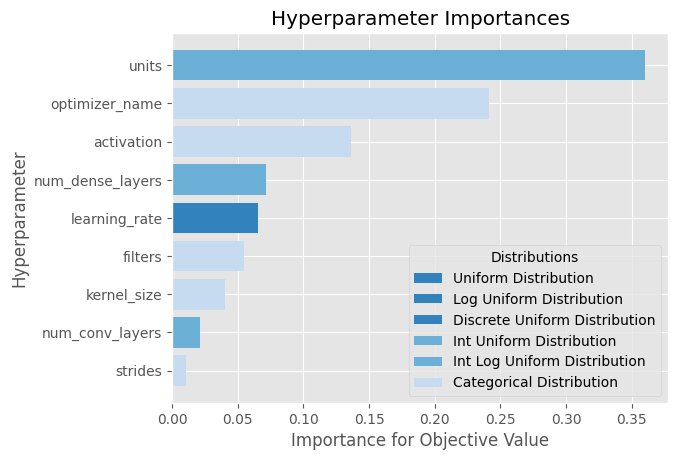

In [8]:
optuna.visualization.matplotlib.plot_param_importances(study)

## Plot parallel coordinate

Plots the high dimensional space of the search. In plain English, the feature combinations.

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\2067141607.py:1: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(


<Axes: title={'center': 'Parallel Coordinate Plot'}>

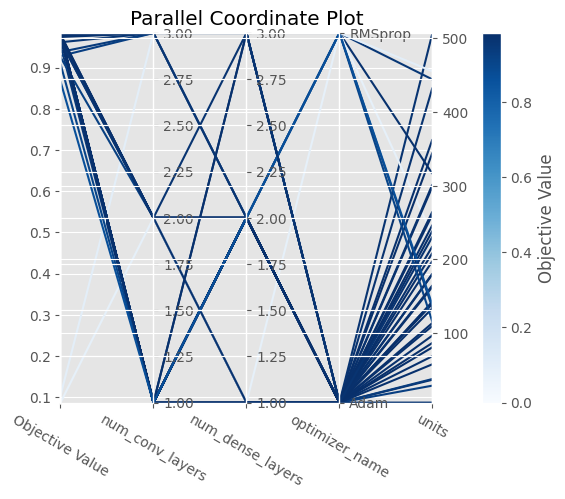

In [9]:
optuna.visualization.matplotlib.plot_parallel_coordinate(   
    study,
    params=["num_conv_layers", "num_dense_layers", "optimizer_name", 'units'],
)

## Compare 2 or more searches

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\2601326980.py:1: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_edf([study])


<Axes: title={'center': 'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

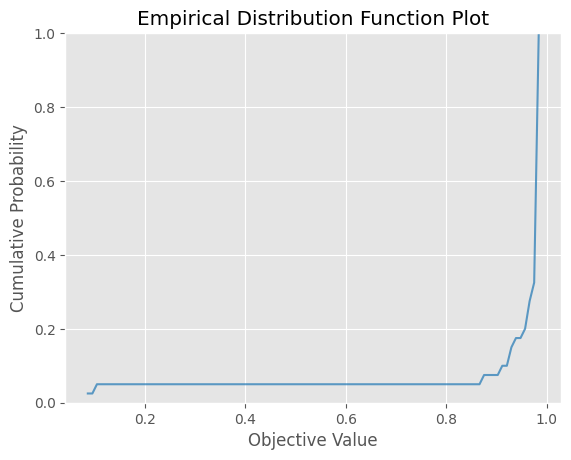

In [10]:
optuna.visualization.matplotlib.plot_edf([study])

C:\Users\msagardi\AppData\Local\Temp\ipykernel_18156\385476931.py:9: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_edf([study, study2])


<Axes: title={'center': 'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

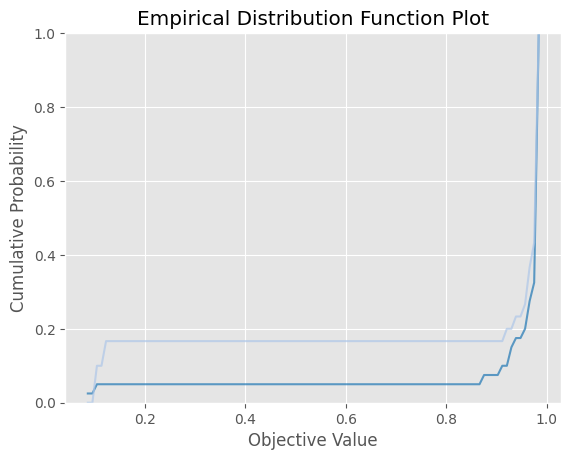

In [11]:
# We can even load two studies and plot them together
study_name2 = "cnn_study_2"
storage_name2 = "sqlite:///{}.db".format(study_name2)

study2 = optuna.load_study(
    study_name=study_name2,
    storage=storage_name2,
)

optuna.visualization.matplotlib.plot_edf([study, study2])

## More examples of visualizations

https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#